In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sub_df= pd.read_csv('//content/sample_submission.csv')
test_df= pd.read_csv('/content/test.csv')
df= pd.read_csv('/content/train.csv')
df.sample(5)

CPU times: user 1min 37s, sys: 12.9 s, total: 1min 50s
Wall time: 1min 50s


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
29679763,2011-04-19 09:18:03.0000001,6.1,2011-04-19 09:18:03 UTC,-73.988710,40.763929,-73.975512,40.757759,1
47007762,2013-01-29 18:39:16.0000001,16.0,2013-01-29 18:39:16 UTC,-74.005731,40.736678,-73.961345,40.756609,1
52062989,2012-02-11 14:52:00.000000144,12.9,2012-02-11 14:52:00 UTC,-73.958217,40.775537,-74.000665,40.746180,1
16146689,2012-02-05 21:56:14.0000002,8.5,2012-02-05 21:56:14 UTC,-73.982482,40.764175,-73.950388,40.775646,2
10675478,2012-06-21 22:24:00.000000180,7.3,2012-06-21 22:24:00 UTC,-73.976747,40.728872,-73.999810,40.738707,2


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '../input/new-york-city-taxi-fare-prediction'
!ls -lh {data_dir}

ls: cannot access '../input/new-york-city-taxi-fare-prediction': No such file or directory


In [9]:
df_test = pd.read_csv('/content/test.csv',parse_dates=['pickup_datetime'])
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


`Why key is an object data type to me this these number in the dataframe?`

In [ ]:
df_test.key.nunique()

9914

### Now lets load training data
I will avoid key column

In [10]:
import random

In [11]:
sample_frac = 0.20

In [ ]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float16',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'uint8'
}
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac  ##

random.seed(7)
df = pd.read_csv("/content/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)
df_original =df.copy()
df

/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/c_parser_wrapper.py:234: RuntimeWarning: overflow encountered in cast
  chunks = self._reader.read_low_memory(nrows)


CPU times: user 3min 47s, sys: 4.12 s, total: 3min 51s
Wall time: 3min 50s


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,16.906250,2010-01-05 16:52:16+00:00,-74.016045,40.711304,-73.979271,40.782004,1
1,7.699219,2012-04-21 04:30:42+00:00,-73.987129,40.733143,-73.991570,40.758092,1
2,7.500000,2012-11-20 20:35:00+00:00,-73.980003,40.751663,-73.973801,40.764842,1
3,9.000000,2012-12-03 13:10:00+00:00,-74.006462,40.726711,-73.993080,40.731628,1
4,5.300781,2012-04-08 07:30:50+00:00,-73.996338,40.737141,-73.980721,40.733559,1
...,...,...,...,...,...,...,...
11079469,18.000000,2015-06-13 20:45:19+00:00,-73.987335,40.755325,-74.015221,40.710213,2
11079470,5.300781,2009-06-03 20:16:35+00:00,-73.976189,40.748318,-73.979683,40.757659,1
11079471,14.000000,2014-03-15 03:28:00+00:00,-74.005272,40.740028,-73.963280,40.762555,1
11079472,14.101562,2011-04-02 22:04:24+00:00,-73.970505,40.752323,-73.960541,40.797342,1


In [ ]:
df.to_csv('20% ofnew-york-city-taxi-fare-predicition.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079474 entries, 0 to 11079473
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   fare_amount        float16            
 1   pickup_datetime    datetime64[ns, UTC]
 2   pickup_longitude   float32            
 3   pickup_latitude    float32            
 4   dropoff_longitude  float32            
 5   dropoff_latitude   float64            
 6   passenger_count    uint8              
dtypes: datetime64[ns, UTC](1), float16(1), float32(3), float64(1), uint8(1)
memory usage: 327.6 MB


In [14]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,67
dropoff_latitude,67
passenger_count,0


Dataset has no missing values

In [ ]:
df.duplicated().sum()

CPU times: user 7.88 s, sys: 4.45 ms, total: 7.89 s
Wall time: 7.86 s


69

In [ ]:
df.drop_duplicates()
df.duplicated().sum()

CPU times: user 16.6 s, sys: 14.1 ms, total: 16.6 s
Wall time: 16.5 s


69

In [17]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [18]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [ ]:
add_trip_distance(df)

CPU times: user 1.78 s, sys: 6.2 ms, total: 1.79 s
Wall time: 574 ms


In [20]:
def add_dateparts(df, col):
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df['weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [ ]:
add_dateparts(df, 'pickup_datetime')

CPU times: user 2.45 s, sys: 0 ns, total: 2.45 s
Wall time: 2.44 s


In [22]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [23]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [ ]:
for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
    add_landmark_dropoff_distance(df, name, lonlat)

CPU times: user 8.19 s, sys: 16.3 ms, total: 8.2 s
Wall time: 2.59 s


In [25]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [ ]:
df = remove_outliers(df)

CPU times: user 1.22 s, sys: 1.61 ms, total: 1.23 s
Wall time: 980 ms


In [32]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:01:04+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:48+0000', tz='UTC'))

In [ ]:
df = df.drop('pickup_datetime', axis=1)
df.head(2)

CPU times: user 461 ms, sys: 60.1 ms, total: 522 ms
Wall time: 517 ms


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,16.906250,-74.016045,40.711304,-73.979271,40.782004,1,8.444430,2010,1,5,1,16,23.056634,8.876137,19.388403,1.382661,8.132255
1,7.699219,-73.987129,40.733143,-73.991570,40.758092,1,2.797752,2012,4,21,5,4,22.178350,10.113211,17.188500,3.362615,5.285693


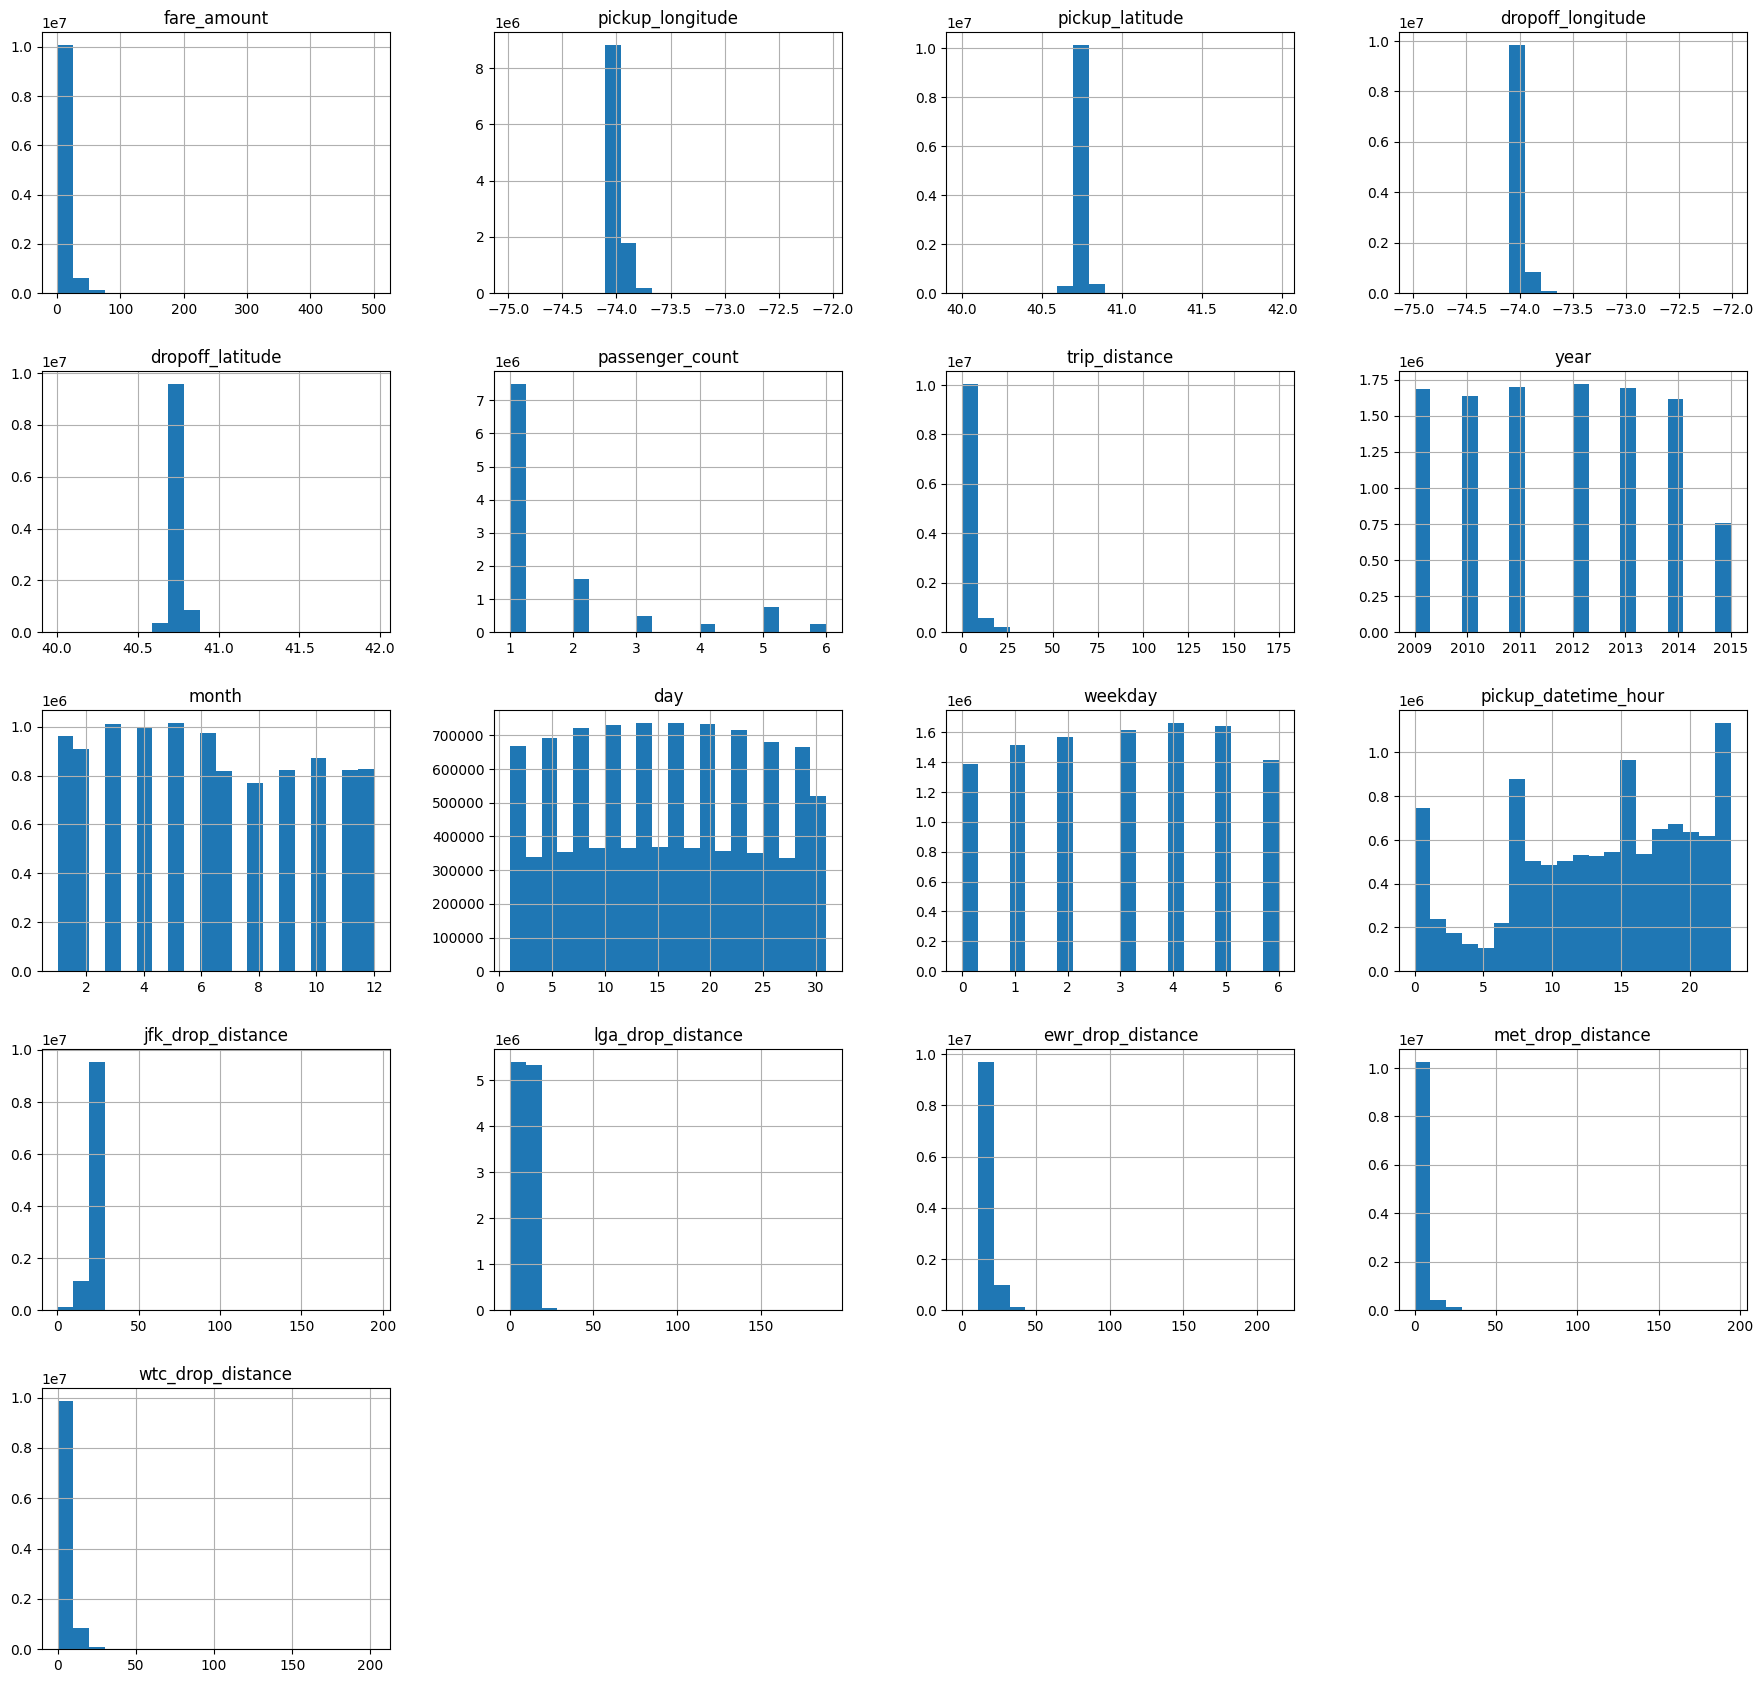

In [ ]:
df.hist(figsize=(22,21), bins=20)

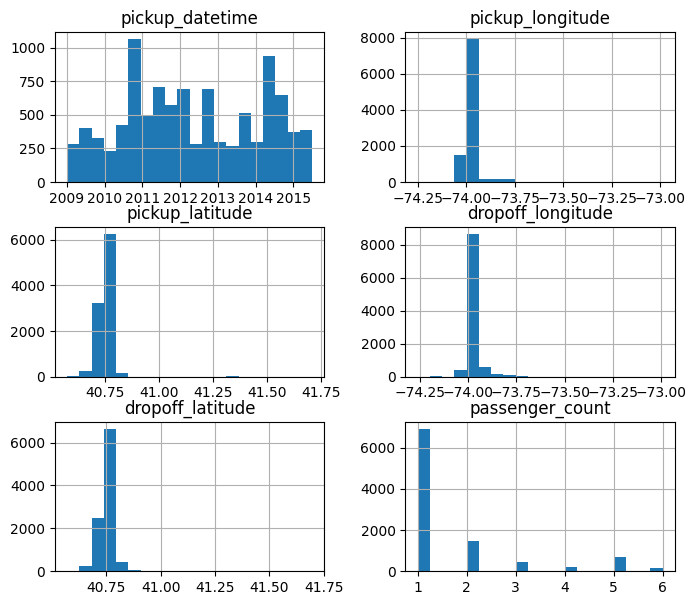

In [42]:
df_test.hist(figsize=(8,7), bins=20);

In [45]:
df_test.pickup_datetime.min(), df_test.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [ ]:
LATITUDE_GRID_SIZE = 1 / 111  # ~1 км по широте
LONGITUDE_GRID_SIZE = 1 / 85  # ~1 км по долготе в Нью-Йорке

# Функция для получения индекса ячейки по координатам
def get_grid_index(lat, lon, lat_grid_size, lon_grid_size):
    lat_idx = int(lat / lat_grid_size)
    lon_idx = int(lon / lon_grid_size)
    return lat_idx, lon_idx

# Добавляем индексы ячеек для точек посадки и высадки
df['dropoff_grid'] = df.apply(lambda row: get_grid_index(
    row['dropoff_latitude'], row['dropoff_longitude'], LATITUDE_GRID_SIZE, LONGITUDE_GRID_SIZE), axis=1)

# Присваиваем уникальный идентификатор для каждой зоны
df['dropoff_grid_lat'] = df['dropoff_grid'].apply(lambda x: x[0])
df['dropoff_grid_lon'] = df['dropoff_grid'].apply(lambda x: x[1])

df.drop(columns=['dropoff_grid'], inplace=True)

In [ ]:
# Добавляем индексы ячеек для точек посадки и высадки
df_test['dropoff_grid'] = df_test.apply(lambda row: get_grid_index(
    row['dropoff_latitude'], row['dropoff_longitude'], LATITUDE_GRID_SIZE, LONGITUDE_GRID_SIZE), axis=1)

# Присваиваем уникальный идентификатор для каждой зоны
df_test['dropoff_grid_lat'] = df_test['dropoff_grid'].apply(lambda x: x[0])
df_test['dropoff_grid_lon'] = df_test['dropoff_grid'].apply(lambda x: x[1])

df_test.drop(columns=['dropoff_grid'], inplace=True)

In [95]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,dropoff_grid_lat,dropoff_grid_lon
0,16.906250,-74.016045,40.711304,-73.979271,40.782004,1,8.444430,2010,1,5,1,16,23.056634,8.876137,19.388403,1.382661,8.132255,4526,-6288
1,7.699219,-73.987129,40.733143,-73.991570,40.758092,1,2.797752,2012,4,21,5,4,22.178350,10.113211,17.188500,3.362615,5.285693,4524,-6289
2,7.500000,-73.980003,40.751663,-73.973801,40.764842,1,1.554805,2012,11,20,1,20,21.453939,8.504931,18.861879,1.847281,6.553110,4524,-6287
3,9.000000,-74.006462,40.726711,-73.993080,40.731628,1,1.252290,2012,12,3,0,13,20.710227,11.215547,15.982913,5.874325,2.545212,4521,-6289
4,5.300781,-73.996338,40.737141,-73.980721,40.733559,1,1.373640,2012,4,8,6,7,19.915357,10.193291,17.040966,5.303332,3.385668,4521,-6288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11079469,18.000000,-73.987335,40.755325,-74.015221,40.710213,2,5.535925,2015,6,13,5,20,21.401272,14.010212,13.614814,8.848431,0.520904,4518,-6291
11079470,5.300781,-73.976189,40.748318,-73.979683,40.757659,1,1.078980,2009,6,3,2,20,21.345335,9.148068,18.070866,2.785977,5.616502,4524,-6288
11079471,14.000000,-74.005272,40.740028,-73.963280,40.762555,1,4.331526,2014,3,15,5,3,20.613929,7.680867,19.552961,1.871914,6.798997,4524,-6286
11079472,14.101562,-73.970505,40.752323,-73.960541,40.797342,1,5.072467,2011,4,2,5,22,23.168621,7.627342,21.636004,2.006333,10.292904,4528,-6286


In [49]:
from sklearn.model_selection import train_test_split

In [124]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [125]:
train_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,dropoff_grid_lat,dropoff_grid_lon
7997646,9.296875,-73.992653,40.758312,-73.985519,40.735726,2,2.580622,2012,2,13,0,22,20.385458,10.442869,16.726648,5.204167,3.289504,4521,-6288
5161690,4.898438,-73.982536,40.745033,-73.993050,40.740023,5,1.046023,2011,7,2,5,18,21.175158,10.826518,16.281871,5.045866,3.361527,4522,-6289
5060892,8.500000,-73.969910,40.763004,-73.993759,40.756390,1,2.137853,2012,4,23,0,21,22.219182,10.334010,16.939531,3.626840,5.052353,4523,-6289
1752887,4.898438,-73.978394,40.689816,-73.988472,40.695013,2,1.026821,2009,6,9,1,20,18.709189,13.255368,15.686554,9.615843,2.660692,4517,-6289
8156641,8.000000,-73.997299,40.763817,-73.981171,40.774044,1,1.770723,2013,5,12,6,4,22.587837,9.023898,18.796480,1.624842,7.243856,4525,-6288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290784,8.101562,-73.983788,40.775738,-73.971344,40.761445,1,1.902504,2011,11,30,2,9,21.054553,8.370645,18.884645,2.109712,6.324645,4524,-6287
4412694,8.000000,-73.951920,40.784454,-73.954796,40.767262,1,1.925659,2015,6,15,0,11,20.432799,6.883297,20.420219,1.523081,7.643505,4525,-6286
10334578,6.898438,-73.962616,40.770477,-73.970711,40.784865,1,1.737754,2012,1,10,1,9,22.753663,8.185665,20.167967,0.876412,8.681791,4527,-6287
6715540,11.703125,-73.979019,40.766682,-73.991859,40.726398,1,4.604975,2009,7,10,4,23,20.344221,11.398642,15.922515,6.364704,2.158841,4520,-6289


In [127]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'trip_distance', 'year', 'month', 'day', 'weekday',
       'pickup_datetime_hour', 'jfk_drop_distance', 'lga_drop_distance',
       'ewr_drop_distance', 'met_drop_distance', 'wtc_drop_distance','dropoff_grid_lat','dropoff_grid_lon']
target_col = 'fare_amount'

In [128]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
train_inputs.head(3)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,dropoff_grid_lat,dropoff_grid_lon
7997646,-73.992653,40.758312,-73.985519,40.735726,2,2.580622,2012,2,13,0,22,20.385458,10.442869,16.726648,5.204167,3.289504,4521,-6288
5161690,-73.982536,40.745033,-73.993050,40.740023,5,1.046023,2011,7,2,5,18,21.175158,10.826518,16.281871,5.045866,3.361527,4522,-6289
5060892,-73.969910,40.763004,-73.993759,40.756390,1,2.137853,2012,4,23,0,21,22.219182,10.334010,16.939531,3.626840,5.052353,4523,-6289


In [129]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [130]:
display(val_inputs.head(3))
display(val_targets.head(3))

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,dropoff_grid_lat,dropoff_grid_lon
4626295,-73.984100,40.760212,-74.000824,40.761970,2,1.421411,2009,8,10,0,10,23.062599,10.801665,16.696680,3.711807,5.539216,4524,-6290
5454962,-73.992462,40.734554,-73.996277,40.748462,4,1.578386,2009,1,2,4,23,21.902363,10.765955,16.378461,4.423736,4.147044,4523,-6289
3349490,-73.985817,40.760571,-73.975960,40.756958,1,0.921663,2010,1,29,4,11,21.049084,8.862957,18.324042,2.715331,5.697748,4524,-6287


,fare_amount
4626295,6.101562
5454962,6.500000
3349490,7.300781


In [131]:
add_dateparts(df_test, 'pickup_datetime')
add_trip_distance(df_test)

for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
    add_landmark_dropoff_distance(df_test, name, lonlat)
df_test.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,dropoff_grid_lat,dropoff_grid_lon
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321801,20.575100,9.760528,17.34643,4.239535,4.218555,4522,-6288
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423830,21.550998,11.316227,15.78934,5.383154,3.098099,4522,-6289


In [132]:
test_inputs = df_test[input_cols]
test_inputs.head(3)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,year,month,day,weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,dropoff_grid_lat,dropoff_grid_lon
0,-73.973320,40.763805,-73.981430,40.743835,1,2.321801,2015,1,27,1,13,20.575100,9.760528,17.346430,4.239535,4.218555,4522,-6288
1,-73.986862,40.719383,-73.998886,40.739201,1,2.423830,2015,1,27,1,13,21.550998,11.316227,15.789340,5.383154,3.098099,4522,-6289
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618239,2011,10,8,5,11,20.594142,9.527242,17.576509,3.947070,4.514211,4522,-6288


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
skewed_features=['pickup_latitude','dropoff_latitude','trip_distance','wtc_drop_distance','met_drop_distance','ewr_drop_distance','lga_drop_distance','jfk_drop_distance']

log_numerical_features=[]

for f in skewed_features:
    train_inputs[f + '_log']=np.log1p(df[f])
    log_numerical_features.append(f + '_log')

In [ ]:
skewed_features=['pickup_latitude','dropoff_latitude','trip_distance','wtc_drop_distance','met_drop_distance','ewr_drop_distance','lga_drop_distance','jfk_drop_distance']

log_numerical_features=[]

for f in skewed_features:
    test_inputs[f + '_log']=np.log1p(df[f])
    log_numerical_features.append(f + '_log')

<ipython-input-111-ef3fce6e5b46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[f + '_log']=np.log1p(df[f])


In [71]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv('/content/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(learning_rate=0.03, max_depth=-1,boosting='gbdt',reg_sqrt = True,max_bin = 5000,early_stopping_round = 50,num_rounds = 5000,num_leaves = 1200,metric='rmse', random_state=42)
model.fit(train_inputs, train_targets,eval_set=[(val_inputs, val_targets)])

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=5000, num_rounds=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.393475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50232
[LightGBM] [Info] Number of data points in the train set: 8646304, number of used features: 18
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=5000, num_rounds=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Info] Start training from score 3.178098
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[

LGBMRegressor(boosting='gbdt', early_stopping_round=50, learning_rate=0.03,
              max_bin=5000, metric='rmse', num_leaves=1200, num_rounds=5000,
              random_state=42, reg_sqrt=True)

In [134]:
predict_and_submit(model, 'light5.csv')

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.626346
1,2015-01-27 13:08:24.0000003,9.716927
2,2011-10-08 11:53:44.0000002,4.172214
3,2012-12-01 21:12:12.0000002,10.168879
4,2012-12-01 21:12:12.0000003,16.446159
...,...,...
9909,2015-05-10 12:37:51.0000002,9.143922
9910,2015-01-12 17:05:51.0000001,10.851509
9911,2015-04-19 20:44:15.0000001,53.835393
9912,2015-01-31 01:05:19.0000005,18.758567
